# Wine Quality Classifier                                                        
                                                            PROJECT BY :- Love Fadia

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.pipeline import Pipeline
%matplotlib inline

In [2]:
Data = pd.read_csv("wine.csv")

In [3]:
Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
Data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
Data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Data Visualization and cleaning

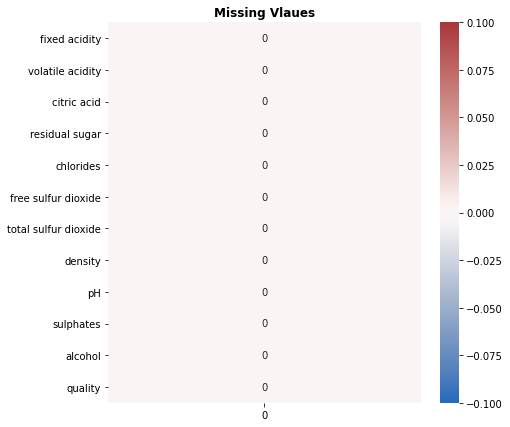

In [6]:
plt.figure(figsize=(7,7))
plt.title("Missing Vlaues" , fontweight = "bold")

ax = sns.heatmap(data=Data.isna().sum().to_frame(),annot= True , fmt= "d", cmap= "vlag" )

plt.show()

### No missing values

<AxesSubplot:>

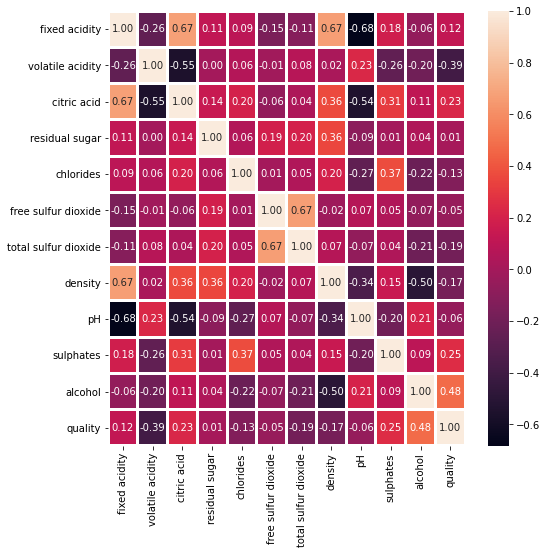

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(Data.corr(), annot=True, fmt='.2f', linewidths=2)

### Alchohol  has the highest corelation and volatile acidity has the lowest corelation 

In [8]:
Data.drop_duplicates(inplace=True)

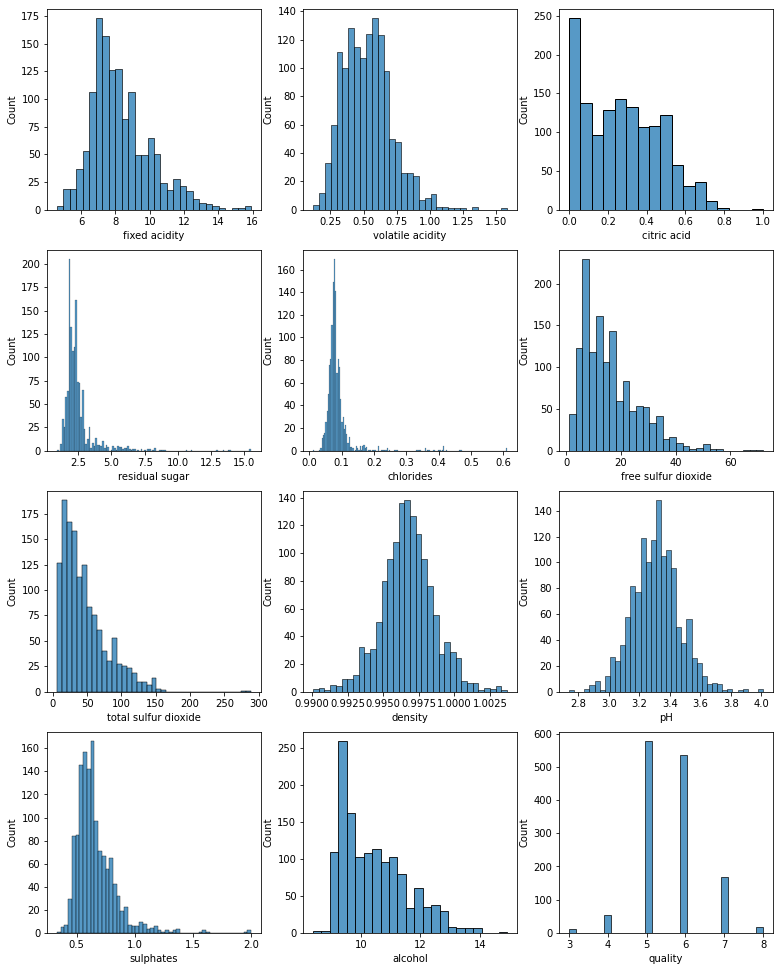

In [9]:
i=1
plt.figure(figsize = (13,17))
for col in Data.columns:
    plt.subplot(4,3,i)
    sns.histplot(Data[col])
    i+=1

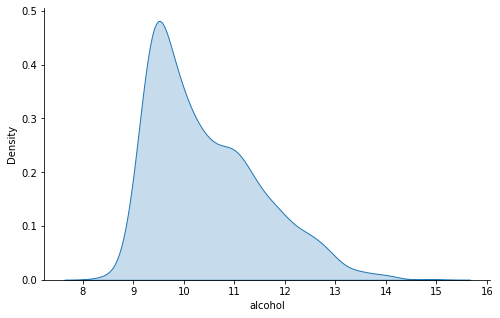

In [10]:
plt.figure(figsize=(8,5))

sns.kdeplot(data= Data , x = "alcohol",  shade= True)
sns.despine()

plt.show()


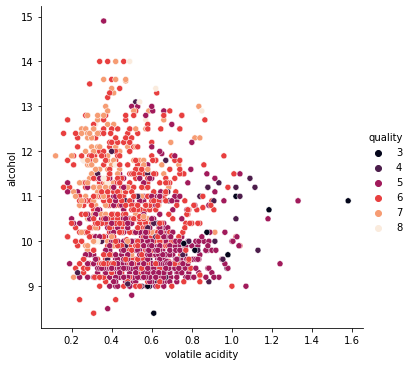

In [11]:
sns.relplot(data= Data , x = "volatile acidity",  y = "alcohol",hue ="quality", palette="rocket")

<AxesSubplot:xlabel='quality', ylabel='count'>

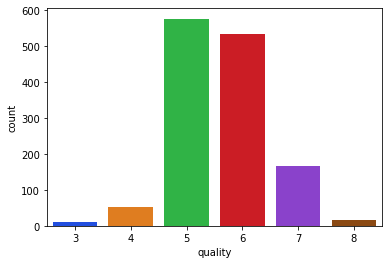

In [12]:
sns.countplot(data= Data , x ="quality", palette="bright")

### This shows that the data is imbalanced

# Scaling Data

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
Data.iloc[:,:-1] = scaler.fit_transform(Data.iloc[:,:-1])


In [14]:
Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374,5
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575,5
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575,5
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575,6
5,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374,5


# Importing Models

In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier ,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [16]:
X = Data.drop("quality",axis=1).values
y = Data["quality"].values


# Balancing Data 

In [17]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
X, y = oversample.fit_resample(X, y)

# Splitting Data

In [18]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

# Training model

In [19]:
rf_model = RandomForestClassifier(n_estimators=225,random_state=31)
rf_model.fit(X_train ,y_train)
y_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_pred, y_test)
rf_acc


0.8402309913378249

In [20]:
dt_model = DecisionTreeClassifier() 
dt_model.fit(X_train ,y_train)
y_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_pred, y_test)
dt_acc


0.7478344562078922

In [21]:
scv_model = SVC(C=3.5,kernel='rbf',gamma="scale",random_state=2)
scv_model.fit(X_train ,y_train)
y_pred = scv_model.predict(X_test)
scv_acc = accuracy_score(y_pred, y_test)
scv_acc


0.7757459095283927

In [22]:
e_model = ExtraTreeClassifier()
e_model.fit(X_train ,y_train)
y_pred = e_model.predict(X_test)
e_acc = accuracy_score(y_pred, y_test)
e_acc


0.7449470644850819

In [23]:
X_model = xgb.XGBClassifier()
X_model.fit(X_train ,y_train)
y_pred = X_model.predict(X_test)
X_acc = accuracy_score(y_pred, y_test)
X_acc


c:\Users\Admin\Desktop\MLprojects\ML\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[19:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8286814244465832

In [24]:
mod=KNeighborsClassifier(n_neighbors=1,leaf_size=10,p=1,metric='manhattan')
mod.fit(X_train,y_train)
pred_3=mod.predict(X_test)
acc1=accuracy_score(pred_3,y_test)
acc1


0.8238691049085659

In [25]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc2 = accuracy_score(y_pred,y_test)
acc2



0.7921077959576516

# Saving Model

In [26]:
from joblib import dump,load
dump(rf_model, "WINE.JOBLIB")

['WINE.JOBLIB']